API Stockholm

In [34]:
import requests
import json
from IPython.display import display, JSON


country_code = "SE"
city = "Stockholm"
location_ids = ["2163258", "6229", "270749", "7947"]   #Torkel, Svea, sundbyberg, Stockholm E4/E20 Lil

# API key
api_key = "7b2fbb569507ae14141d3de0ff76044999ae3859816024ab9d2978c83bc3d804"


headers = {
    "Accept": "application/json",
    "x-api-key": api_key
}

# loop for the location
for location_id in location_ids:
    
    url = f"https://api.openaq.org/v2/locations/{location_id}"
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        # Save the data 
        filename = f"location_{location_id}.json"
        with open(filename, 'w') as json_file:
            json.dump(data, json_file, indent=4)
        
        print(f"Data saved to {filename}")
    else:
        print(f'Error for location ID {location_id}: {response.status_code}, {response.text}')


Data saved to location_2163258.json
Data saved to location_6229.json
Data saved to location_270749.json
Data saved to location_7947.json


Sveavägen

Combined all Json files

In [ ]:
import pandas as pd
import json
import os

# Construct the full path dynamically
directory = os.path.join(os.getcwd())
# List to hold all extracted data
all_data = []

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        filepath = os.path.join(directory, filename)
        
        with open(filepath, 'r') as json_file:
            data = json.load(json_file)
        
        # Loop through each result in the current file
        for result in data['results']:
            location_name = result['name']
            meter_id = result['id']
            lat = result['coordinates']['latitude']
            lon = result['coordinates']['longitude']

            # Extract the 'day' and 'time' 
            last_updated = result['lastUpdated']
            day, time = last_updated.split('T')
            time = time.split('+')[0]  # Remove the timezone if present

            # Initialize dictionary with default None for each pollutant
            parameter_values = {
                "meter ID": meter_id,
                "location name": location_name,
                "lat": lat,
                "lon": lon,
                "day": day,
                "time": time,
                "pm2.5": None,
                "pm10": None,
                "so2": None,
                "no": None,
                "o3": None
            }

            # Map JSON parameter names to desired column names
            param_map = {
                "pm25": "pm2.5",
                "pm10": "pm10",
                "so2": "so2",
                "no2": "no",
                "o3": "o3"
            }

            # Loop through parameters to find specific pollutants
            for parameter in result['parameters']:
                parameter_name = parameter['parameter']
                last_value = parameter['lastValue']

                # Add the parameter's last value to the dictionary if it matches
                if parameter_name in param_map:
                    parameter_values[param_map[parameter_name]] = last_value

            # Append the dictionary to the all_data list
            all_data.append(parameter_values)

# Convert the combined data to a DataFrame
df = pd.DataFrame(all_data)

# Reorder columns to match desired order
df = df[["meter ID", "location name", "lat", "lon", "day", "time", "pm2.5", "pm10", "so2", "no", "o3"]]

# Display the DataFrame
print(df)

# Optionally, save the DataFrame to a CSV file
df.to_csv('Stockholm_combined.csv', index=False)


historic data

In [61]:
import requests
import json
from IPython.display import display, JSON


country_code = "SE"
city = "Stockholm"
#location_ids = ["2163258", "6229", "270749"]   #Torkel, Svea, sundbyberg
location_ids = ['4318', '154', '4767', '7529', '4593'] # Madrid, London, Berlin, Rome, Helsinki
 

# API key
api_key = "7b2fbb569507ae14141d3de0ff76044999ae3859816024ab9d2978c83bc3d804"


headers = {
    "Accept": "application/json",
    "x-api-key": api_key
}

# loop for the location
for location_id in location_ids:
    
    url = f"https://api.openaq.org/v1/measurements?date_from=2023-01-01&limit=10000&page=1&offset=0&sort=desc&radius=1000&location_id={location_id}&order_by=datetime"

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        # Save the data 
        filename = f"location_{location_id}.json"
        with open(filename, 'w') as json_file:
            json.dump(data, json_file, indent=4)
        
        print(f"Data saved to {filename}")
    else:
        print(f'Error for location ID {location_id}: {response.status_code}, {response.text}')


Data saved to location_4318.json
Data saved to location_154.json
Data saved to location_4767.json
Data saved to location_7529.json
Data saved to location_4593.json


In [ ]:
import pandas as pd
import json
import os

# Construct the full path dynamically
directory = os.path.join(os.getcwd())
# List to hold all extracted data
all_data = []



# Loop through each file in the directory
param_map = {
    "pm25": "pm2.5",
    "pm10": "pm10",
    "so2": "so2",
    "no2": "no2",
    "o3": "o3",
    "co": "co",
    "no": "no",
    "nox": "nox"
    
}

# Initialize a dictionary to collect data
all_data = {}

# Loop through each JSON file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.json'):
        filepath = os.path.join(directory, filename)
        
        with open(filepath, 'r') as json_file:
            results = json.load(json_file)['results']
        
        # Loop through each result in the JSON file
        for result in results:
            day, time = result['date']['utc'].split("T")
            location = result['location']
            lat = result['coordinates']['latitude']
            lon = result['coordinates']['longitude']
            param = result['parameter']

            # Use a tuple as a unique key for each location, day, and time
            key = (location, day, time)

            # If the key doesn't exist in all_data, initialize the entry
            if key not in all_data:
                all_data[key] = {
                    "location name": location,
                    "lat": lat,
                    "lon": lon,
                    "day": day,
                    "time": time,
                    "pm2.5": None,
                    "pm10": None,
                    "so2": None,
                    "no2": None,
                    "o3": None,
                    "co": None,
                    "no": None,
                    "nox": None
                    
                }

            # Set the appropriate value in the existing entry
                       # Safeguard against any parameters not in the param_map
            if param in param_map:
                # Set the appropriate value in the existing entry
                all_data[key][param_map[param]] = result['value']
            else:
                print(f"Warning: Parameter '{param}' is not in param_map and was skipped.")
            

# Convert the dictionary to a DataFrame
df = pd.DataFrame(all_data.values())

# Reorder columns
df = df[["location name", "lat", "lon", "day", "time", "pm2.5", "pm10", "so2", "no2", "o3", "co","no", "nox"]]

# Display the DataFrame
print(df)

# Save to CSV
df.to_csv('historic_combined.csv', index=False)


In [65]:

daily_averages = df.groupby("location name")  # Madrid, London, Berlin, Rome, Helsinki
print(daily_averages)


In [68]:
numeric_columns = ['pm2.5', 'pm10', 'so2', 'no2', 'o3']
daily_averages = df.groupby(['location name', 'day'])[numeric_columns].mean().reset_index()


print(daily_averages)

        location name         day  pm2.5  pm10       so2        no2         o3
0             Arenula  2024-05-19    NaN   NaN       NaN  17.111111  52.875000
1             Arenula  2024-05-20   17.0  55.0       NaN  26.304348  38.541667
2             Arenula  2024-05-21    6.0  17.0       NaN  11.333333  62.095238
3             Arenula  2024-05-22    NaN   NaN       NaN  11.363636  56.090909
4             Arenula  2024-05-23    NaN   NaN       NaN  18.416667  36.458333
..                ...         ...    ...   ...       ...        ...        ...
589  PLAZA DEL CARMEN  2024-08-31    NaN   NaN  1.857143  14.142857  73.857143
590  PLAZA DEL CARMEN  2024-09-01    NaN   NaN  2.090909  14.727273  64.545455
591  PLAZA DEL CARMEN  2024-09-02    NaN   NaN  2.000000  20.000000  84.000000
592  PLAZA DEL CARMEN  2024-09-03    NaN   NaN  2.666667  14.333333  62.333333
593  PLAZA DEL CARMEN  2024-09-04    NaN   NaN  3.000000  10.000000  71.000000

[594 rows x 7 columns]


Data exploring 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [83]:
df = daily_averages
grouped_data = df.drop(columns=['day']).groupby('location name').mean()


In [80]:

df.fillna(df.mean(numeric_only=True), inplace=True)
print(df.describe())

            pm2.5        pm10         so2         no2          o3
count  594.000000  594.000000  594.000000  594.000000  594.000000
mean    10.091455   17.728862    1.866544   18.998770   57.148984
std      3.853830    6.774235    1.074037    9.959680   22.403191
min      2.184071    1.000000   -1.000000   -1.000000   -1.000000
25%      8.010870   14.402604    1.312404   11.571255   37.359127
50%     10.091455   17.728862    1.866544   17.833333   60.652083
75%     11.000000   20.000000    2.080208   24.825000   73.273924
max     31.000000   76.000000    4.800000   55.625761  131.000000


## the values that considered normal for the variables 
value of pm 2.5 below 12 is considerd healthy
value of pm 10 below 54 is considerd healthy
vlue of  SO2 sulphur dioxide is 120 µg/m3 as a 24-hour average
value of NO2 is 20-90 μg/m3 
The current National Ambient Air Quality Standard for o3 ozone is of 70 parts per billion (ppb)
# according to the stadered value of the air quality we have normal values in our data giving that we have the average value over the hole period. 





In [85]:
corr_matrix = grouped_data.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
          pm2.5      pm10       so2       no2        o3
pm2.5  1.000000  0.986037  0.582373  0.640133 -0.586123
pm10   0.986037  1.000000  0.622136  0.608109 -0.485275
so2    0.582373  0.622136  1.000000  0.276067  0.220770
no2    0.640133  0.608109  0.276067  1.000000 -0.686794
o3    -0.586123 -0.485275  0.220770 -0.686794  1.000000


positive coreelation between the variables except a negative one between o3 and pm25, pm10 and no2
according to the research the correlation between o3 and pm2.5 can be both positive and negative depends on the place and the season 

plot for Arenula

In [ ]:

df['day'] = pd.to_datetime(df['day'])
location = 'Arenula'
location_data = df[df['location name'] == location]

# Set 'day' as the index for better plotting
location_data = location_data.set_index('day')
location_data = location_data.sort_index()

# Drop non-numeric columns (like 'location name') for clearer plotting
location_data = location_data.drop(columns=['location name'])

# Plot all columns for this location
location_data.plot(figsize=(8, 6))

# Add labels and title
plt.title(f'Variables over Time for {location}')
plt.xlabel('Date')
plt.ylabel('Values')

# Show the plot
plt.tight_layout()
plt.show()


plot for PLAZA DEL CARMEN

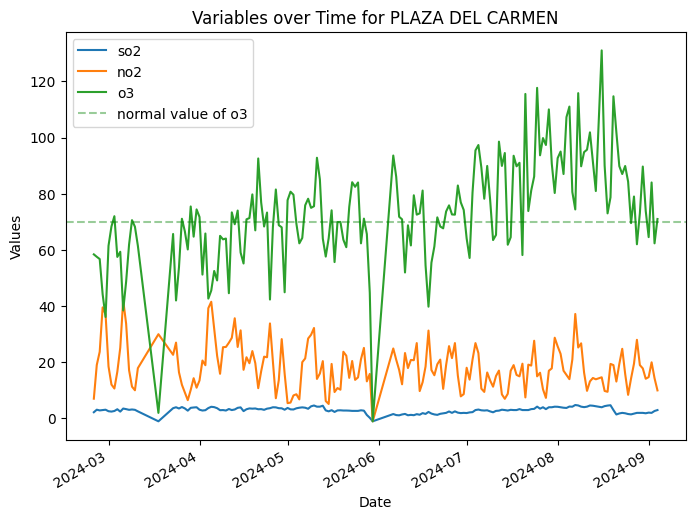

In [94]:

df['day'] = pd.to_datetime(df['day'])
location = 'PLAZA DEL CARMEN'
location_data = df[df['location name'] == location]

# Set 'day' as the index for better plotting
location_data = location_data.set_index('day')
location_data = location_data.sort_index()

# Drop non-numeric columns (like 'location name') for clearer plotting
location_data = location_data.drop(columns=['location name','pm2.5','pm10'])

# Plot all columns for this location
ax = location_data.plot(figsize=(8, 6))

# Define a custom value for the horizontal line (unrelated to the data)
custom_value = 70  # You can change this value to whatever you want


# Add a customized horizontal line at the custom value, with transparency (alpha) set to 0.5
plt.axhline(y=custom_value, color='green', linestyle='--', alpha=0.4, label=f'normal value')
plt.axhline(y=custom_value, color='green', linestyle='--', alpha=0.4, label=f'normal value')


# Add labels and title
plt.title(f'Variables over Time for {location}')
plt.xlabel('Date')
plt.ylabel('Values')

# Add a legend to indicate the custom line
plt.legend()

plot for London

In [ ]:

df['day'] = pd.to_datetime(df['day'])
location = 'London Marylebone Road'
location_data = df[df['location name'] == location]

# Set 'day' as the index for better plotting
location_data = location_data.set_index('day')
location_data = location_data.sort_index()

# Drop non-numeric columns (like 'location name') for clearer plotting
location_data = location_data.drop(columns=['location name','pm2.5','pm10'])

# Plot all columns for this location
ax = location_data.plot(figsize=(8, 6))

# Define a custom value for the horizontal line (unrelated to the data)
custom_value = 70  # You can change this value to whatever you want


# Add a customized horizontal line at the custom value, with transparency (alpha) set to 0.5
plt.axhline(y=custom_value, color='green', linestyle='--', alpha=0.4, label=f'normal value')


#ax.set_ylim(0, 100)
# Add labels and title
plt.title(f'Variables over Time for {location}')
plt.xlabel('Date')
plt.ylabel('Values')

# Add a legend to indicate the custom line
plt.legend()

the final data

In [5]:
df_final = pd.read_csv('sensor_data_all_final.csv')

df_clean = df_final.dropna()